<a href="https://colab.research.google.com/github/Avijitma123/Cnacer-Predictor-GUI-using-ML/blob/master/Heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
df=pd.read_csv('heart_failure.csv')
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
x=df.iloc[:,0:13]
y=df.iloc[:,12:]


scale the input data 

In [12]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(x)

Split data into train and test

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [21]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(32, activation='relu', input_shape=(13,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
hist=model.fit(X_train, Y_train,batch_size=32, epochs=100,validation_data=(X_val, Y_val))

Epoch 1/100
7/7 [==============================] - 1s 30ms/step - loss: 0.7177 - accuracy: 0.3623 - val_loss: 0.7032 - val_accuracy: 0.4889
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.7137 - accuracy: 0.4072 - val_loss: 0.6885 - val_accuracy: 0.4889
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.7046 - accuracy: 0.4432 - val_loss: 0.6751 - val_accuracy: 0.5778
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6853 - accuracy: 0.5948 - val_loss: 0.6633 - val_accuracy: 0.6000
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6894 - accuracy: 0.5792 - val_loss: 0.6521 - val_accuracy: 0.6667
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6717 - accuracy: 0.6456 - val_loss: 0.6420 - val_accuracy: 0.7111
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.6530 - accuracy: 0.6817 - val_loss: 0.6328 - val_accuracy: 0.7333
Epoch 8/100
7/7 [=========

In [22]:
model.evaluate(X_test, Y_test)[1]

2/2 [==============================] - 0s 3ms/step - loss: 0.1057 - accuracy: 1.0000


1.0

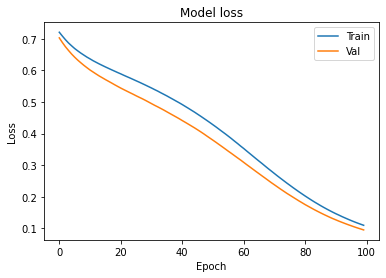

In [23]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

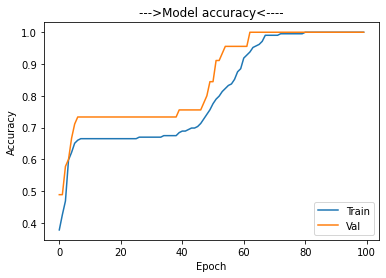

In [26]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('--->Model accuracy<----')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()